<strong class="ql-size-large">Частина перша: Знайомство з Pandas.</strong>
<p>Прочитайте дані за допомогою методу&nbsp;<code>read_html&nbsp;</code>з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"&nbsp;<a href="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8" rel="noopener noreferrer" target="_blank">посилання</a></p>

In [98]:
import pandas as pd

ref = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
table_name = "Коефіцієнт народжуваності в регіонах"

tables = pd.read_html(ref, match=table_name, thousands='.', decimal=',') #, na_values=["—"])
birth_coef = tables[0]
print(birth_coef)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

<li>Вивести перші рядки таблиці за допомогою методу <code>head</code></li>

In [99]:
print(birth_coef.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


<li>Визначте кількість рядків та стовпців у датафреймі (атрибут&nbsp;<code>shape</code>)</li>

In [100]:
print(birth_coef.shape)

(28, 9)


<li>Замініть у таблиці значення "—" на значення NaN</li>

In [101]:
birth_coef.replace("—", "NaN", inplace=True)
print(birth_coef)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

<li>Визначте типи всіх стовпців за допомогою&nbsp;<code>dataframe.dtypes</code></li>

In [102]:
print(birth_coef.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


<li>Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"</li>

In [103]:

for i in birth_coef.columns:
    if birth_coef[i].dtypes != "float64":
        try:
            birth_coef[i] = birth_coef[i].astype("float64")
        except:
            continue
print(birth_coef.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


<li>Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи&nbsp;<code>isnull</code>&nbsp;та&nbsp;<code>sum</code>)</li>

In [104]:
missing_values_fraction = birth_coef.isnull().sum() / len(birth_coef)
print(missing_values_fraction)


Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


<li>Видаліть з таблиці дані по всій країні, останній рядок таблиці</li>

In [105]:
birth_coef = birth_coef.drop(birth_coef.index[-1])
print(birth_coef)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

<li>Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод&nbsp;<code>fillna</code>)</li>

In [107]:
column_means = birth_coef.mean(numeric_only=True).round(1)
birth_coef = birth_coef.fillna(column_means)
print(birth_coef)


               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

<li>Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні</li>

In [111]:
mean_birth_rate_ukraine_2019 = birth_coef['2019'].mean()
regions_above_avg_2019 = birth_coef[birth_coef['2019'] > mean_birth_rate_ukraine_2019]['Регіон'].tolist()
print("Список регіонів з рівнем народжуваності вищим за середній по Україні у 2019 році:")
print(regions_above_avg_2019)


Список регіонів з рівнем народжуваності вищим за середній по Україні у 2019 році:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


<li>У якому регіоні була найвища народжуваність у 2014 році?</li>

In [114]:
region_highest_birthrate_2014 = birth_coef.loc[birth_coef['2014'].idxmax(), 'Регіон']
max_birthrate_2014 = birth_coef['2014'].max()

print(f"У регіоні {region_highest_birthrate_2014} була найвища народжуваність у 2014 році з рівнем {max_birthrate_2014}.")


У регіоні Рівненська була найвища народжуваність у 2014 році з рівнем 14.8.


<li>Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році</li>

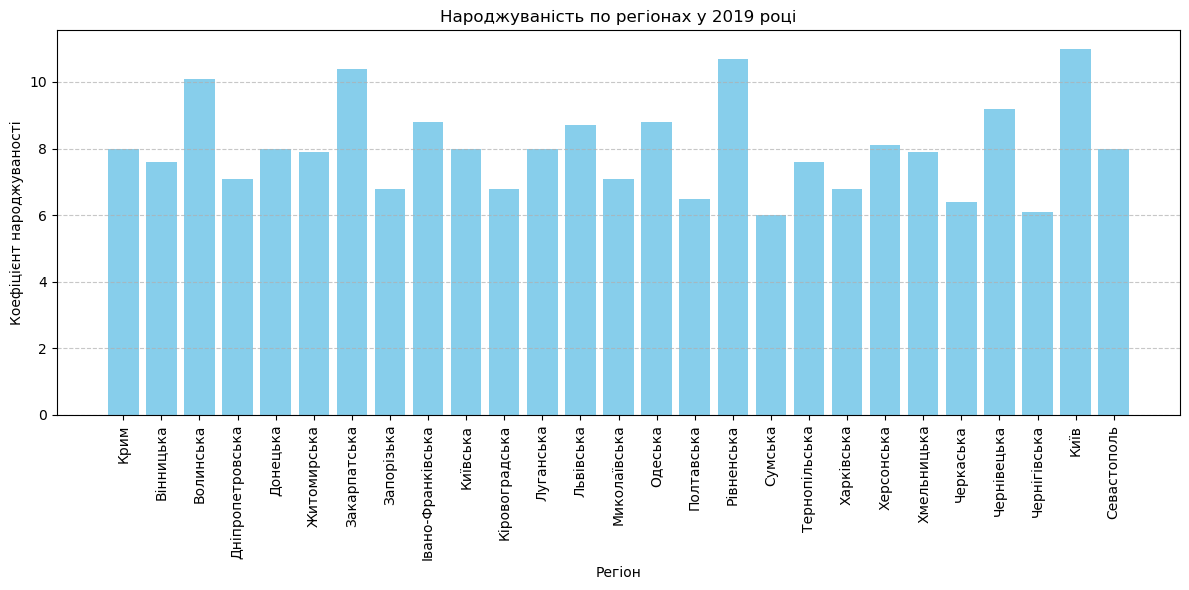

In [121]:
import matplotlib.pyplot as plt

# Вибір даних для 2019 року
births_2019 = birth_coef[['Регіон', '2019']].dropna()

plt.figure(figsize=(12, 6))
plt.bar(births_2019['Регіон'], births_2019['2019'], color='skyblue')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
